## Installing Seaborn

[Seaborn](http://seaborn.pydata.org/) is another data visuaization library, like matplotlib but a little less insane. Install it by using `pip3`.

```bash
pip3 install seaborn
```

## Using Seaborn

First let's read in our data.

In [2]:
%matplotlib inline
import pandas as pd

df = pd.read_csv("countries.csv")
df.head(2)

country continent  gdp_per_capita  life_expectancy  population
0  Afghanistan      Asia             663           54.863    22856302
1      Albania    Europe            4195           74.200     3071856

## Histograms

Seaborn doesn't plug into pandas, so you can't just do `.plot`. You need to import seaborn separately, then feed it the dataframe *and* the data.

I think **everything has weird names** when you're using seaborn, but that's just me.

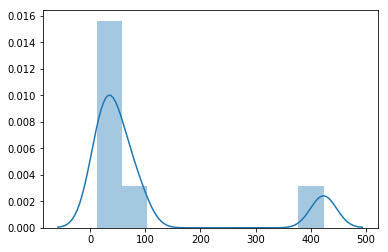

In [4]:
sns.distplot([45,32,12,57,86,423,23])

In [5]:
df.life_expectancy

0      54.863
1      74.200
2      68.963
3      45.234
4      73.544
5      73.822
6      71.494
7      79.930
8      78.330
9      66.851
10     72.370
11     74.497
12     65.309
13     73.118
14     68.990
15     77.910
16     70.425
17     55.261
18     60.307
19     62.994
20     74.882
21     50.567
22     70.261
23     75.927
24     71.590
25     50.589
26     48.251
27     62.030
28     51.960
29     79.410
        ...  
158    67.851
159    48.689
160    79.840
161    79.990
162    73.316
163    76.020
164    63.570
165    50.010
166    70.921
167    59.468
168    53.585
169    70.810
170    68.533
171    73.159
172    70.010
173    63.925
174    48.126
175    67.790
176    74.163
177    78.040
178    76.800
179    74.777
180    66.999
181    67.438
182    72.432
183    73.777
184    70.929
185    60.404
186    41.802
187    43.976
Name: life_expectancy, Length: 188, dtype: float64

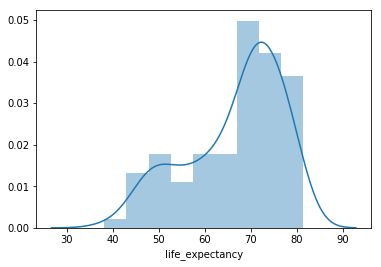

In [6]:
import seaborn as sns

sns.distplot(df.life_expectancy)

### More bins!

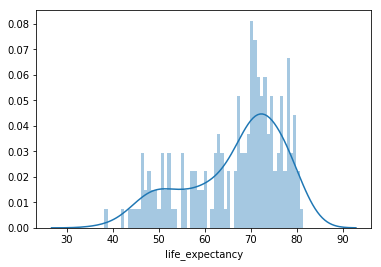

In [8]:
sns.distplot(df.life_expectancy, bins=60)

### Wait, we want a count on the left-hand side, not a percentage

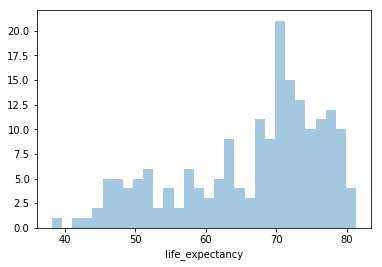

In [9]:
sns.distplot(df.life_expectancy, bins=30, kde=False)

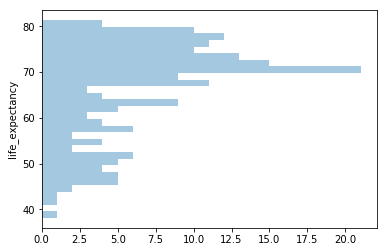

In [11]:
sns.distplot(df.life_expectancy, bins=30, kde=False, vertical=True)

## Scatter plot

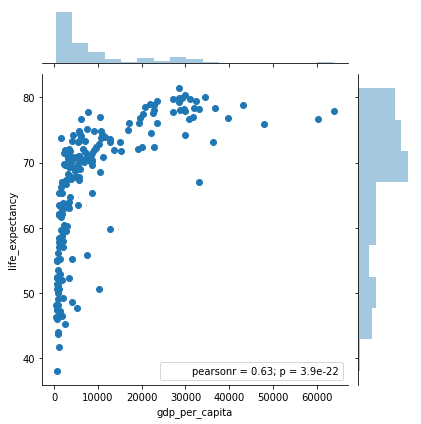

In [12]:
sns.jointplot(x="gdp_per_capita", y="life_expectancy", data=df)

### No wait, let's get rid of all that weird stuff

Even though the documentation *says* that's how you do a scatter plot, I don't think you can get rid of all of that weird stuff. So, time to use another plot.

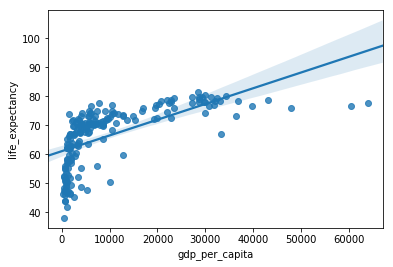

In [13]:
sns.regplot(x="gdp_per_capita", y="life_expectancy", data=df);

### No wait, I don't want that regression line

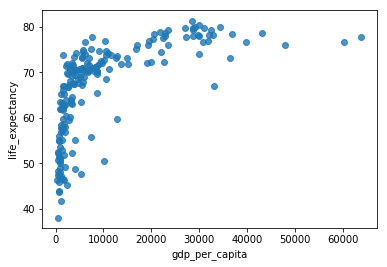

In [14]:
sns.regplot(x="gdp_per_capita", y="life_expectancy", data=df, fit_reg=False);

### No wait, I want to use a method with a different name that for some reason does the same time

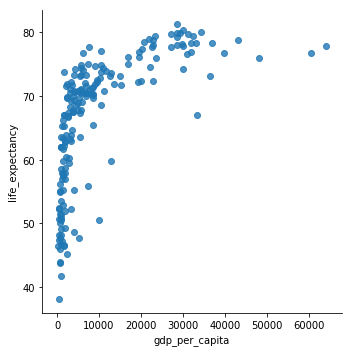

In [17]:
sns.lmplot(x="gdp_per_capita", y="life_expectancy", data=df, fit_reg=False);

### But also COLOR!

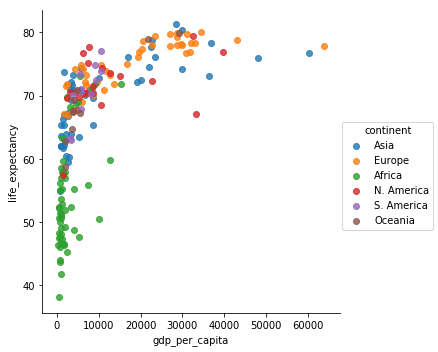

In [27]:
sns.lmplot(x="gdp_per_capita", y="life_expectancy", hue="continent", data=df, fit_reg=False);

## Small multiples

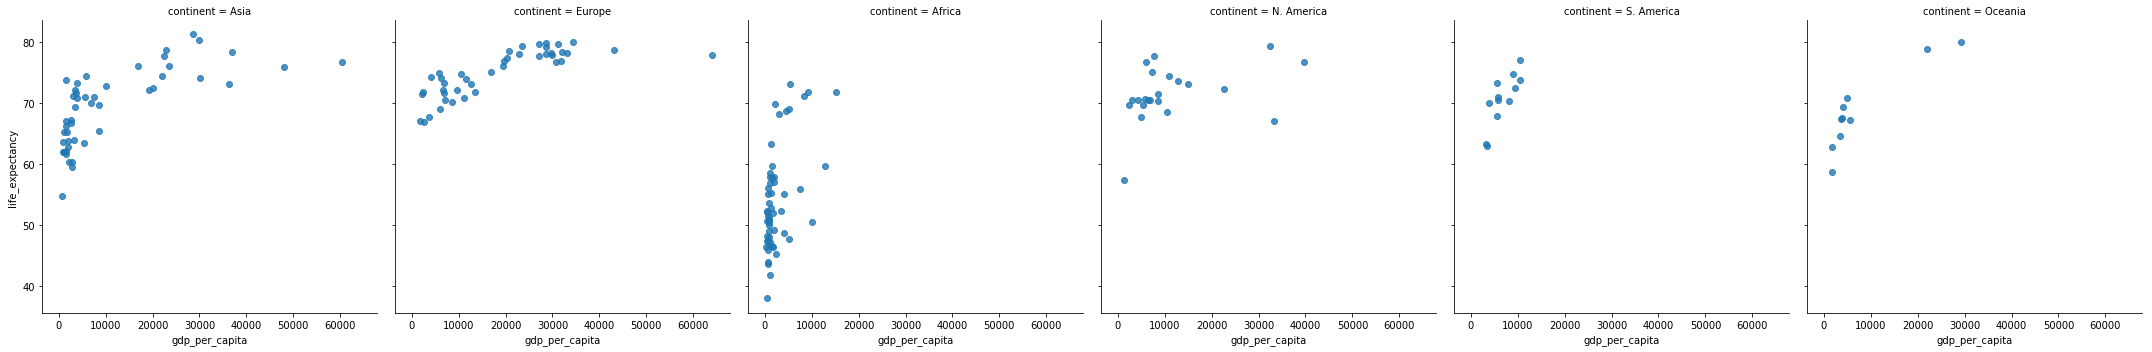

In [22]:
sns.lmplot(x="gdp_per_capita", y="life_expectancy", col="continent", data=df, fit_reg=False);

## But those are TOO SMALL

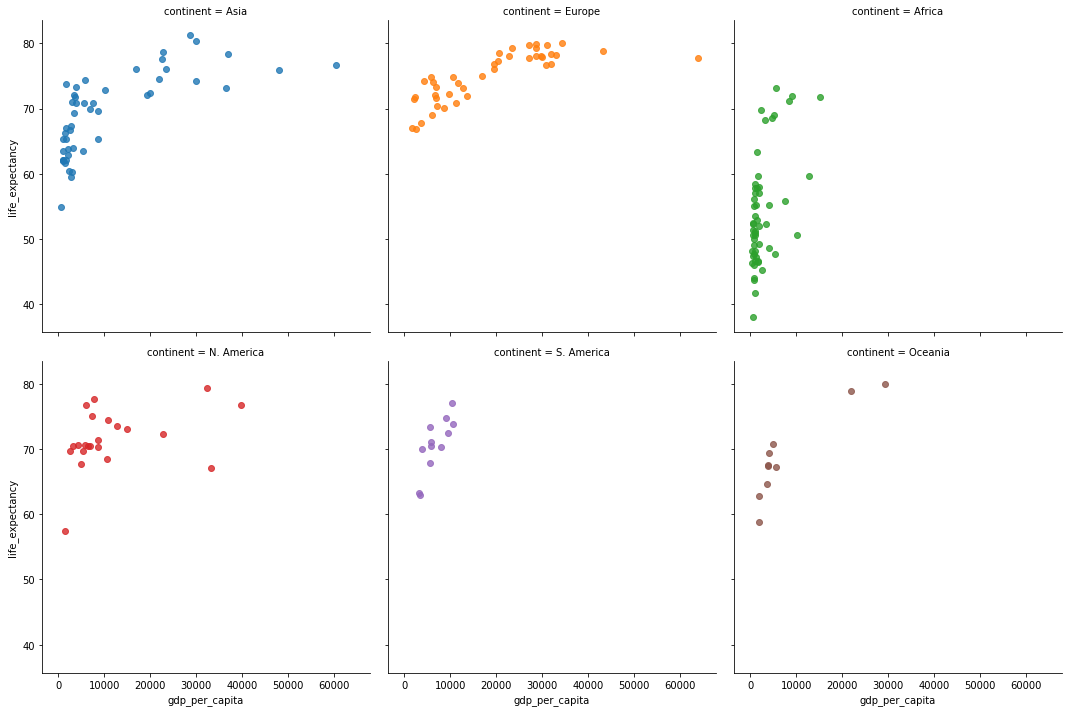

In [29]:
sns.lmplot(x="gdp_per_capita", 
           y="life_expectancy", 
           col="continent", 
           col_wrap=3, 
           data=df, 
           fit_reg=False,
           hue="continent")

## Bar graphs

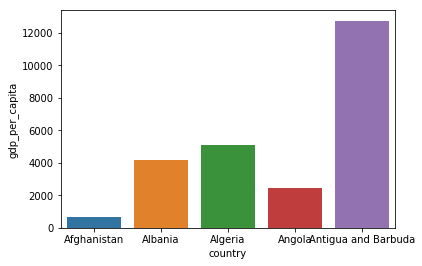

In [31]:
sns.barplot(x="country", y="gdp_per_capita", data=df.head())

### Sideways!

Beware, we have to switch `x` and `y`.

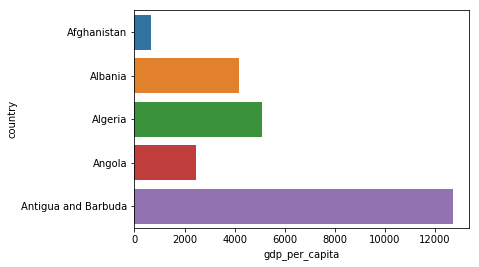

In [32]:
sns.barplot(x="gdp_per_capita", y="country", data=df.head(), orient='h')

## Saving to pdf

Same as ever!

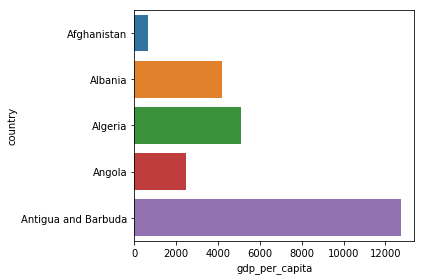

In [34]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42

sns.barplot(x="gdp_per_capita", y="country", data=df.head(), orient='h')
plt.tight_layout()
plt.savefig("seaborn.pdf")